In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./extracted/energy_iter9.csv')
df.head(10)

,Date,DayPeakGen(MW),EveningPeakGen(MW),MaxDemand(MW),MaxGen(MW),Temp(C),Year,Month,Season,IsHoliday
0,2024-12-31,14543,14949,10600,14949,18.7,2024,12,lowTempSeason,No
1,2024-12-31,10596,11883,10100,11883,18.7,2024,12,lowTempSeason,No
2,2024-12-30,13760,15475,10800,15475,21.8,2024,12,lowTempSeason,No
3,2024-12-29,14372,14729,10800,14729,21.2,2024,12,lowTempSeason,No
4,2024-12-28,14138,14492,9850,14492,21.2,2024,12,lowTempSeason,No
5,2024-12-27,13791,14419,10600,14419,21.4,2024,12,lowTempSeason,Yes
6,2024-12-26,13645,14092,10600,14092,21.9,2024,12,lowTempSeason,No
7,2024-12-25,12982,13683,10500,13683,21.2,2024,12,lowTempSeason,No
8,2024-12-24,12696,13349,10700,13349,20.5,2024,12,lowTempSeason,No
9,2024-12-23,12705,13515,10700,13515,20.4,2024,12,lowTempSeason,No


In [3]:
df = df.drop(columns=['DayPeakGen(MW)', 'EveningPeakGen(MW)'])
df.head(10)

,Date,MaxDemand(MW),MaxGen(MW),Temp(C),Year,Month,Season,IsHoliday
0,2024-12-31,10600,14949,18.7,2024,12,lowTempSeason,No
1,2024-12-31,10100,11883,18.7,2024,12,lowTempSeason,No
2,2024-12-30,10800,15475,21.8,2024,12,lowTempSeason,No
3,2024-12-29,10800,14729,21.2,2024,12,lowTempSeason,No
4,2024-12-28,9850,14492,21.2,2024,12,lowTempSeason,No
5,2024-12-27,10600,14419,21.4,2024,12,lowTempSeason,Yes
6,2024-12-26,10600,14092,21.9,2024,12,lowTempSeason,No
7,2024-12-25,10500,13683,21.2,2024,12,lowTempSeason,No
8,2024-12-24,10700,13349,20.5,2024,12,lowTempSeason,No
9,2024-12-23,10700,13515,20.4,2024,12,lowTempSeason,No


In [4]:
df['Season'] = df['Season'].map({ 'highTempSeason': 1, 'lowTempSeason': 0 })
df.head(10)

,Date,MaxDemand(MW),MaxGen(MW),Temp(C),Year,Month,Season,IsHoliday
0,2024-12-31,10600,14949,18.7,2024,12,0,No
1,2024-12-31,10100,11883,18.7,2024,12,0,No
2,2024-12-30,10800,15475,21.8,2024,12,0,No
3,2024-12-29,10800,14729,21.2,2024,12,0,No
4,2024-12-28,9850,14492,21.2,2024,12,0,No
5,2024-12-27,10600,14419,21.4,2024,12,0,Yes
6,2024-12-26,10600,14092,21.9,2024,12,0,No
7,2024-12-25,10500,13683,21.2,2024,12,0,No
8,2024-12-24,10700,13349,20.5,2024,12,0,No
9,2024-12-23,10700,13515,20.4,2024,12,0,No


In [5]:
df['IsHoliday'] = df['IsHoliday'].map({ 'Yes': 1, 'No': 0 })
df.head(10)

,Date,MaxDemand(MW),MaxGen(MW),Temp(C),Year,Month,Season,IsHoliday
0,2024-12-31,10600,14949,18.7,2024,12,0,0
1,2024-12-31,10100,11883,18.7,2024,12,0,0
2,2024-12-30,10800,15475,21.8,2024,12,0,0
3,2024-12-29,10800,14729,21.2,2024,12,0,0
4,2024-12-28,9850,14492,21.2,2024,12,0,0
5,2024-12-27,10600,14419,21.4,2024,12,0,1
6,2024-12-26,10600,14092,21.9,2024,12,0,0
7,2024-12-25,10500,13683,21.2,2024,12,0,0
8,2024-12-24,10700,13349,20.5,2024,12,0,0
9,2024-12-23,10700,13515,20.4,2024,12,0,0


In [6]:
df.describe()

,MaxDemand(MW),MaxGen(MW),Temp(C),Year,Month,Season,IsHoliday
count,1644.000000,1644.000000,1644.000000,1644.000000,1644.000000,1644.000000,1644.000000
mean,12282.137470,14120.095499,27.233090,2022.167883,6.858881,0.675791,0.145985
std,1979.530122,1532.989559,3.811737,1.332597,3.405918,0.468221,0.353199
min,7800.000000,9482.000000,14.000000,2020.000000,1.000000,0.000000,0.000000
25%,10600.000000,13169.750000,24.800000,2021.000000,4.000000,0.000000,0.000000
50%,12400.000000,14440.500000,28.600000,2022.000000,7.000000,1.000000,0.000000
75%,13900.000000,15200.250000,30.000000,2023.000000,10.000000,1.000000,0.000000
max,17300.000000,17638.000000,33.800000,2024.000000,12.000000,1.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1644 entries, 0 to 1643
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1644 non-null   object 
 1   MaxDemand(MW)  1644 non-null   int64  
 2   MaxGen(MW)     1644 non-null   int64  
 3   Temp(C)        1644 non-null   float64
 4   Year           1644 non-null   int64  
 5   Month          1644 non-null   int64  
 6   Season         1644 non-null   int64  
 7   IsHoliday      1644 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 102.9+ KB


In [8]:
duplicates = df.duplicated()
duplicates.any()

np.False_

In [9]:
null_values = df.isnull().sum()
null_values

Date             0
MaxDemand(MW)    0
MaxGen(MW)       0
Temp(C)          0
Year             0
Month            0
Season           0
IsHoliday        0
dtype: int64

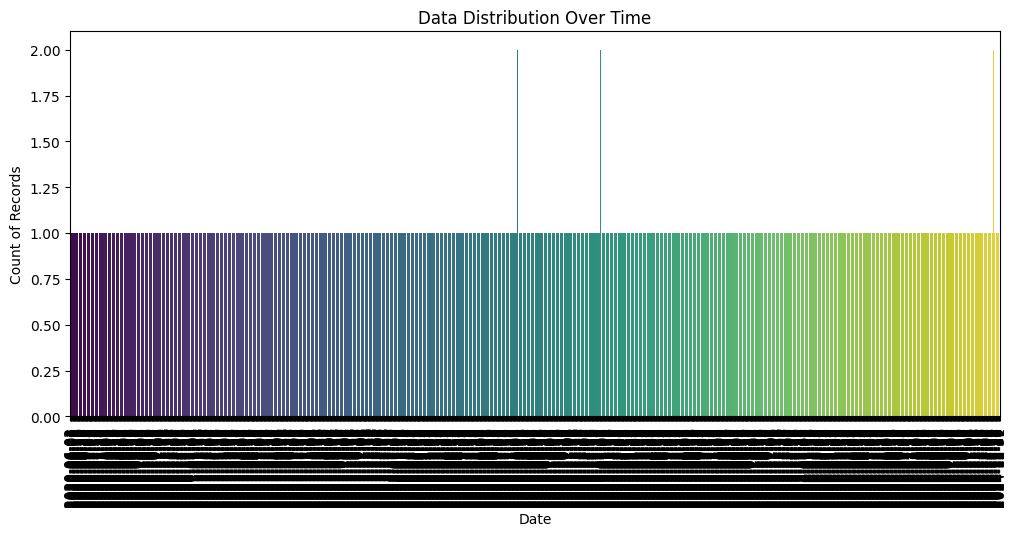

In [10]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Count the number of entries each day
daily_counts = df.groupby(df['Date'].dt.date).size()

# Plot using seaborn
plt.figure(figsize=(12, 5))
sns.barplot(x=daily_counts.index, y=daily_counts.values, hue=daily_counts.index, palette="viridis", legend=False)

plt.title("Data Distribution Over Time")
plt.xlabel("Date")
plt.ylabel("Count of Records")
plt.xticks(rotation=90)
plt.show()

In [11]:
# Find duplicated dates
repeated_dates = df[df['Date'].duplicated(keep=False)]

# Display the repeated dates
repeated_dates

,Date,MaxDemand(MW),MaxGen(MW),Temp(C),Year,Month,Season,IsHoliday
0,2024-12-31,10600,14949,18.7,2024,12,0,0
1,2024-12-31,10100,11883,18.7,2024,12,0,0
11,2024-12-21,9800,13670,20.1,2024,12,0,0
12,2024-12-21,9200,13812,20.1,2024,12,0,0
13,2024-12-19,10500,14223,20.3,2024,12,0,0
14,2024-12-19,10500,14157,20.3,2024,12,0,0
703,2023-01-03,10400,11259,19.5,2023,1,0,0
704,2023-01-03,9800,10061,19.5,2023,1,0,0
705,2023-01-02,9800,10145,20.0,2023,1,0,0
706,2023-01-02,10400,11299,20.0,2023,1,0,0


In [12]:
indices_to_drop = [1, 11, 13, 703, 705, 708, 855, 1072]

df = df.drop(indices_to_drop)
df = df.reset_index(drop=True)

df.head(10)

,Date,MaxDemand(MW),MaxGen(MW),Temp(C),Year,Month,Season,IsHoliday
0,2024-12-31,10600,14949,18.7,2024,12,0,0
1,2024-12-30,10800,15475,21.8,2024,12,0,0
2,2024-12-29,10800,14729,21.2,2024,12,0,0
3,2024-12-28,9850,14492,21.2,2024,12,0,0
4,2024-12-27,10600,14419,21.4,2024,12,0,1
5,2024-12-26,10600,14092,21.9,2024,12,0,0
6,2024-12-25,10500,13683,21.2,2024,12,0,0
7,2024-12-24,10700,13349,20.5,2024,12,0,0
8,2024-12-23,10700,13515,20.4,2024,12,0,0
9,2024-12-22,10600,14032,19.8,2024,12,0,0


In [13]:
sns.set_palette(palette='gnuplot2_r')

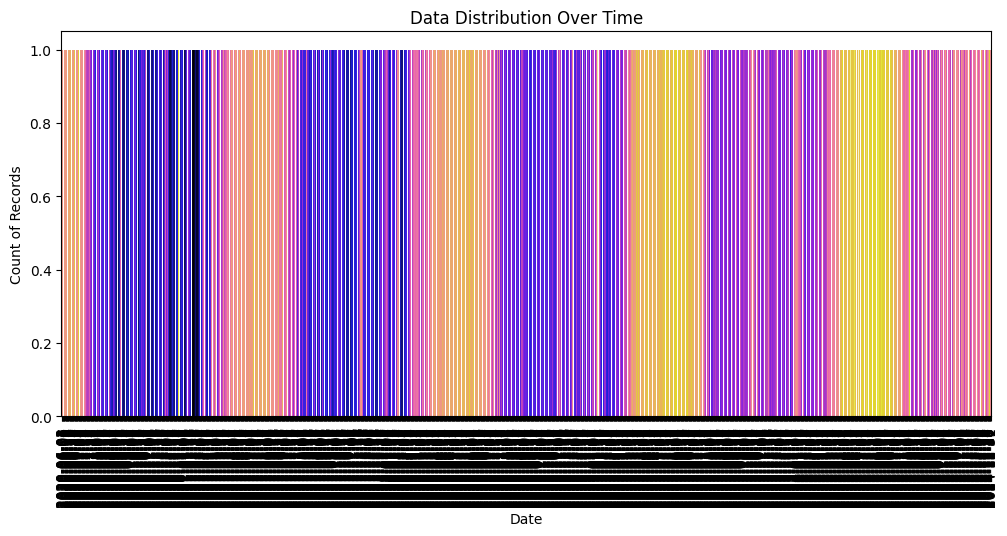

In [14]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Count the number of entries each day
daily_counts = df.groupby(df['Date'].dt.date).size()

# Plot using seaborn
plt.figure(figsize=(12, 5))
sns.barplot(x=daily_counts.index, y=daily_counts.values, hue=df['MaxDemand(MW)'], palette='gnuplot2_r', legend=False)

plt.title("Data Distribution Over Time")
plt.xlabel("Date")
plt.ylabel("Count of Records")
plt.xticks(rotation=90)
plt.show()


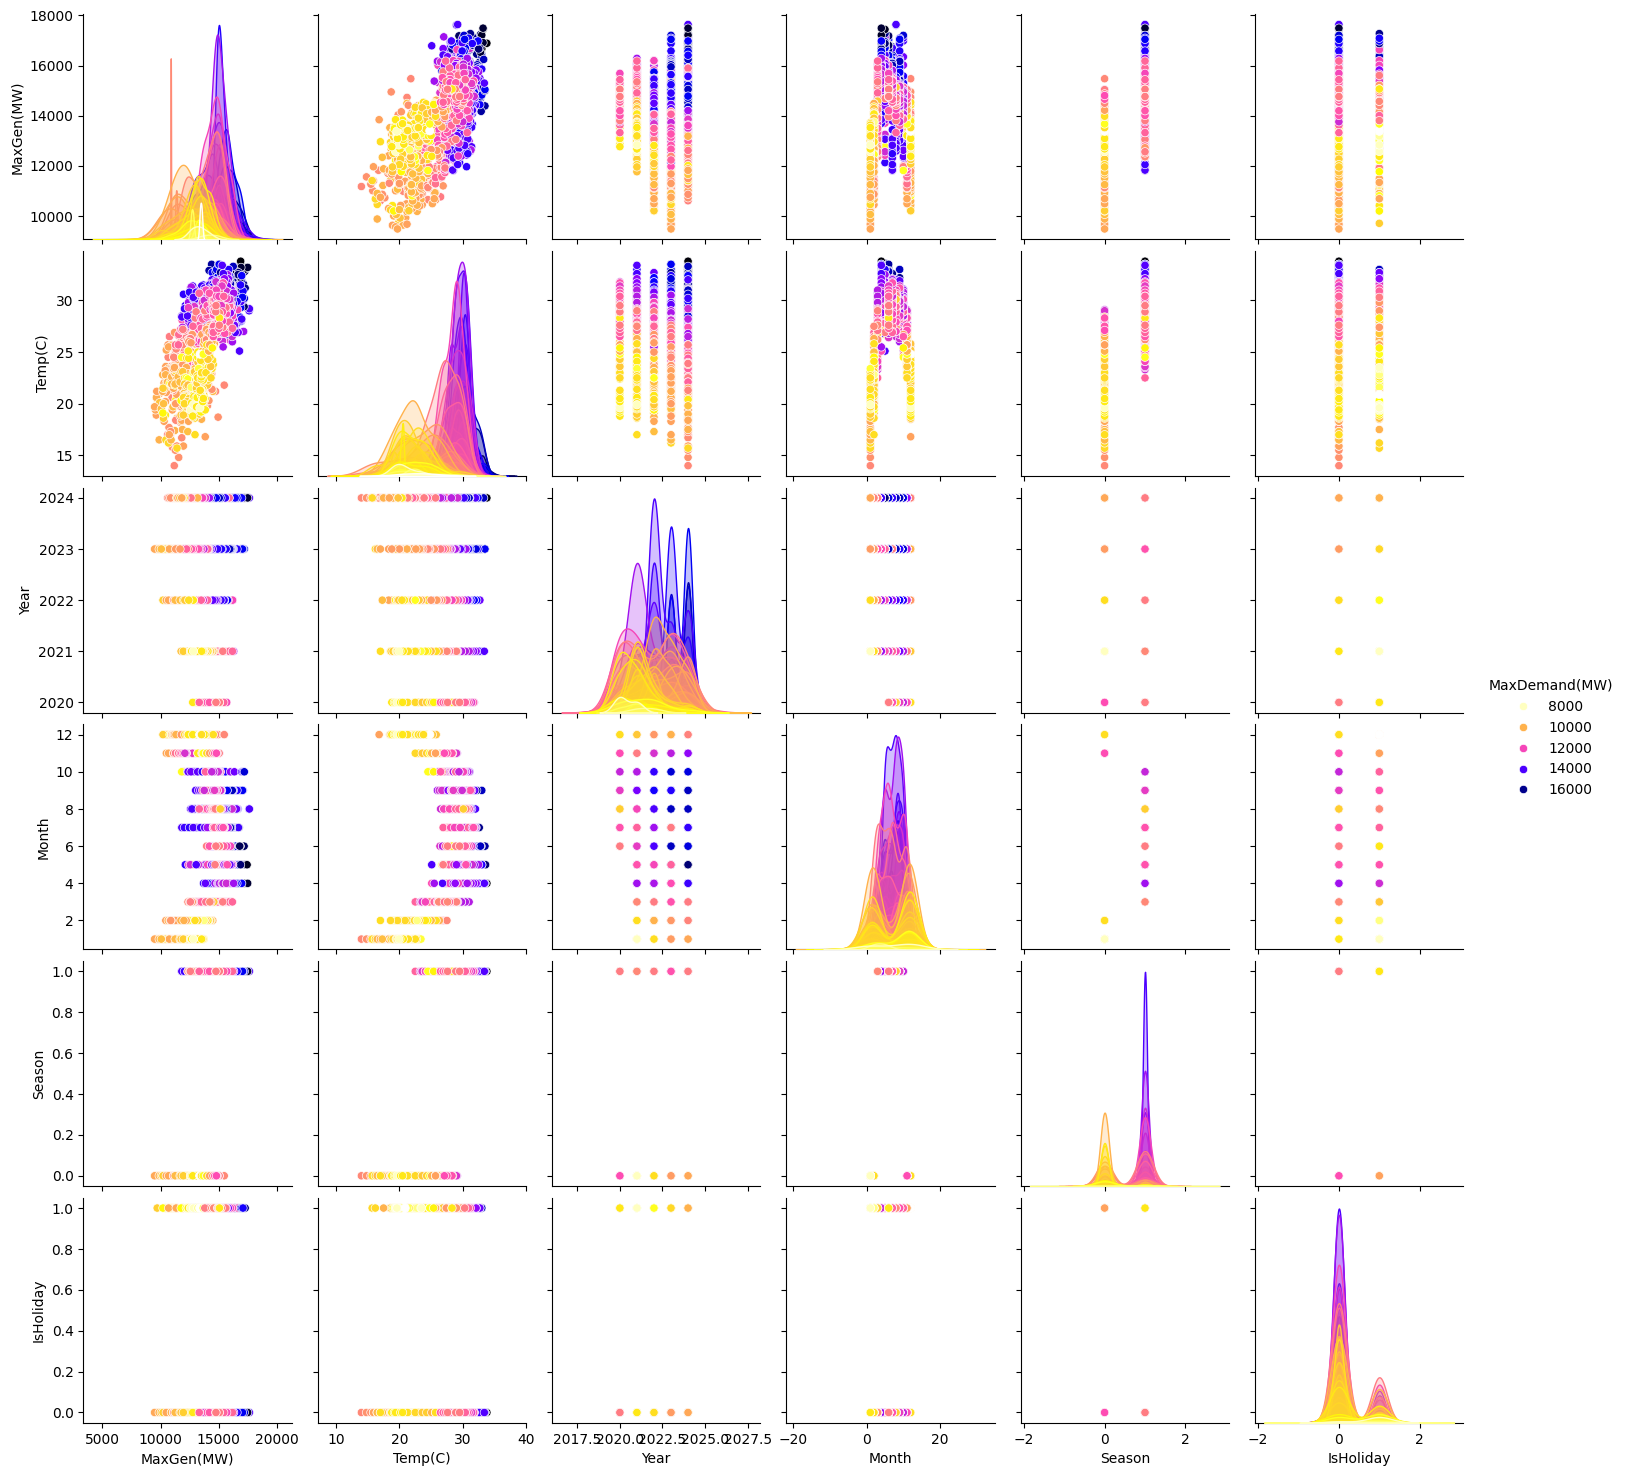

In [15]:
sns.pairplot(df, hue='MaxDemand(MW)', palette='gnuplot2_r')

In [16]:
sns.set_theme(palette="gnuplot")

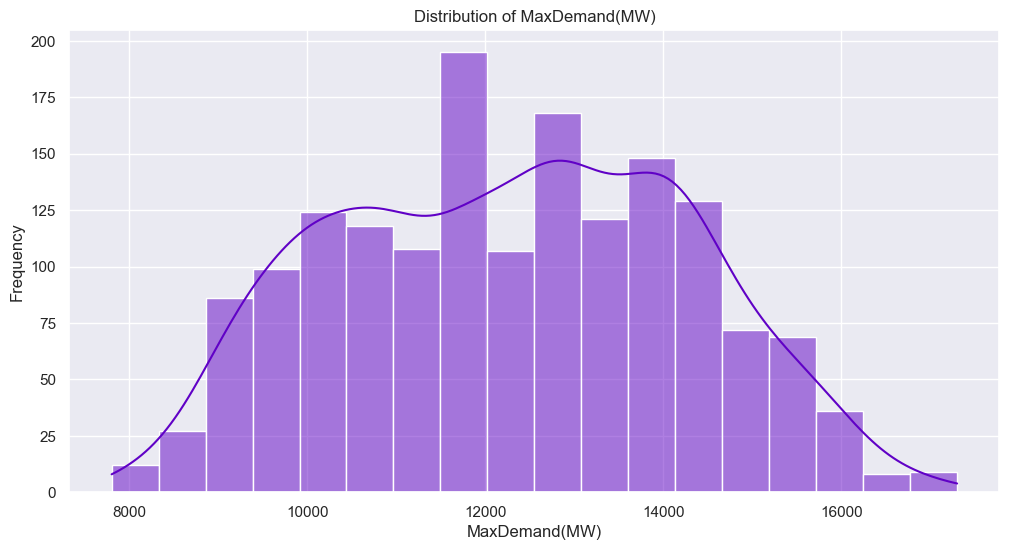

In [17]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='MaxDemand(MW)', kde=True)
plt.title('Distribution of MaxDemand(MW)')
plt.xlabel('MaxDemand(MW)')
plt.ylabel('Frequency')
plt.legend([], [], frameon=False)
plt.show()

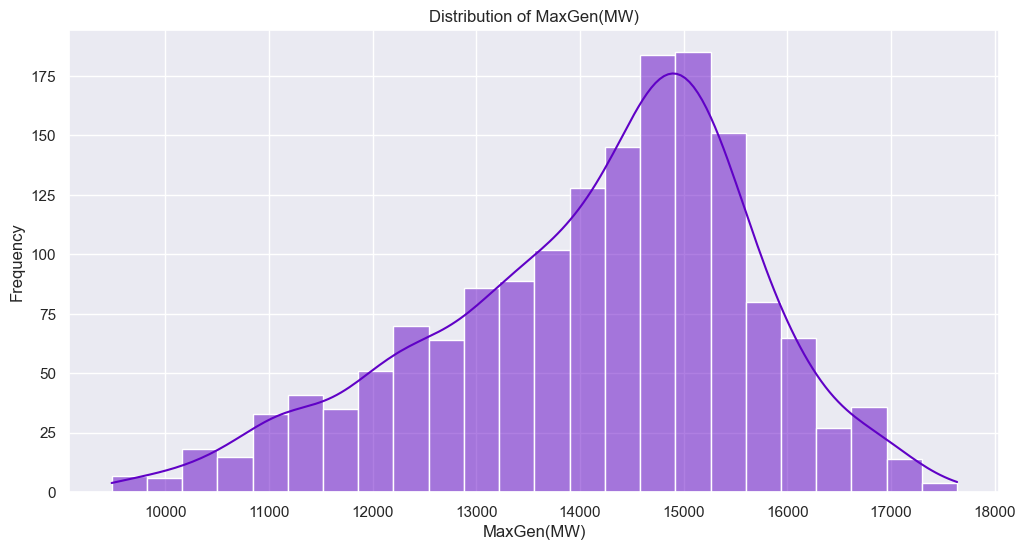

In [18]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='MaxGen(MW)', kde=True)
plt.title('Distribution of MaxGen(MW)')
plt.xlabel('MaxGen(MW)')
plt.ylabel('Frequency')
plt.legend([], [], frameon=False)
plt.show()

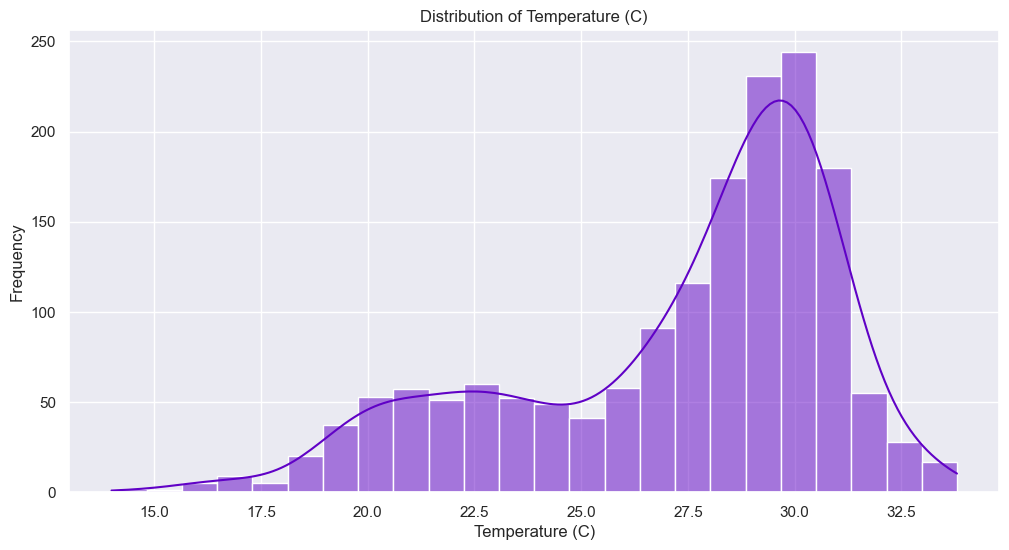

In [19]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Temp(C)', kde=True)
plt.title('Distribution of Temperature (C)')
plt.xlabel('Temperature (C)')
plt.ylabel('Frequency')
plt.legend([], [], frameon=False)
plt.show()

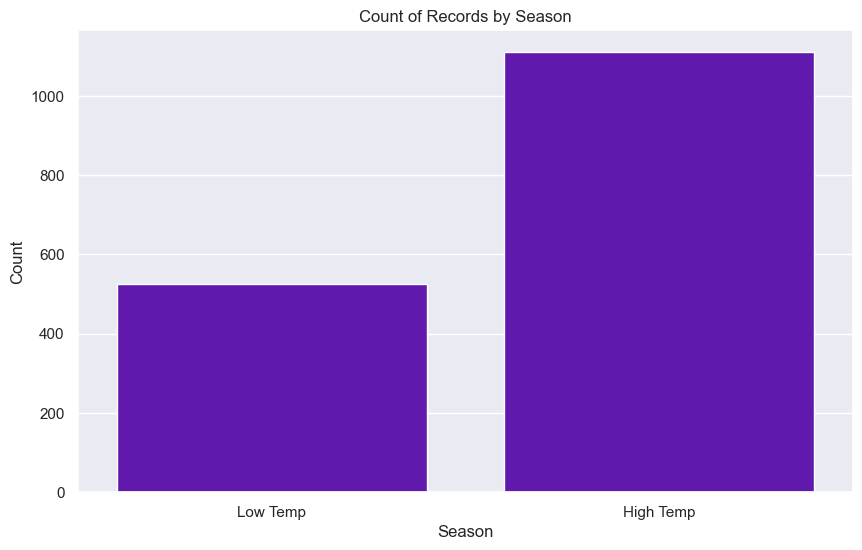

In [20]:
# Map the season values to labels
df['Season'] = df['Season'].map({0: 'Low Temp', 1: 'High Temp'})

# Plot the count of each season
plt.figure(figsize=(10, 6))
sns.countplot(x='Season', data=df)

plt.title('Count of Records by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

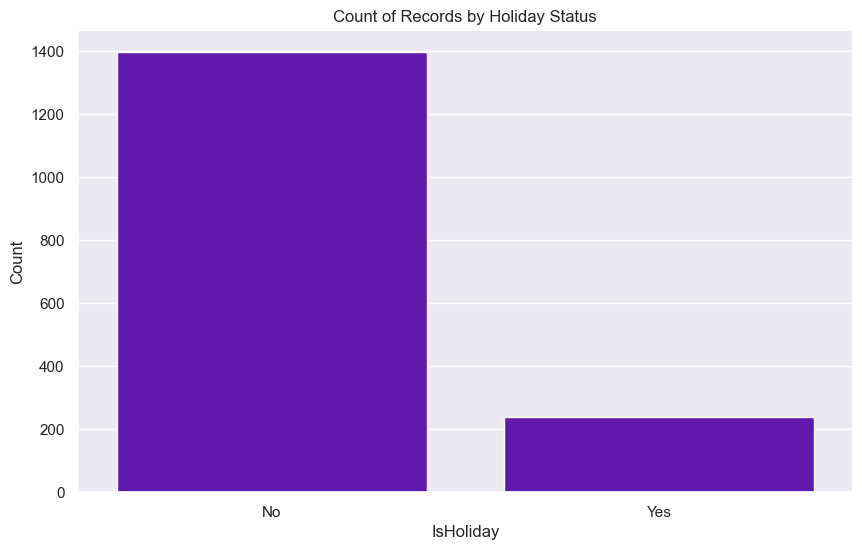

In [21]:
# Map the IsHoliday values to labels
df['IsHoliday'] = df['IsHoliday'].map({0: 'No', 1: 'Yes'})

# Plot the count of each holiday status
plt.figure(figsize=(10, 6))
sns.countplot(x='IsHoliday', data=df)

plt.title('Count of Records by Holiday Status')
plt.xlabel('IsHoliday')
plt.ylabel('Count')
plt.show()

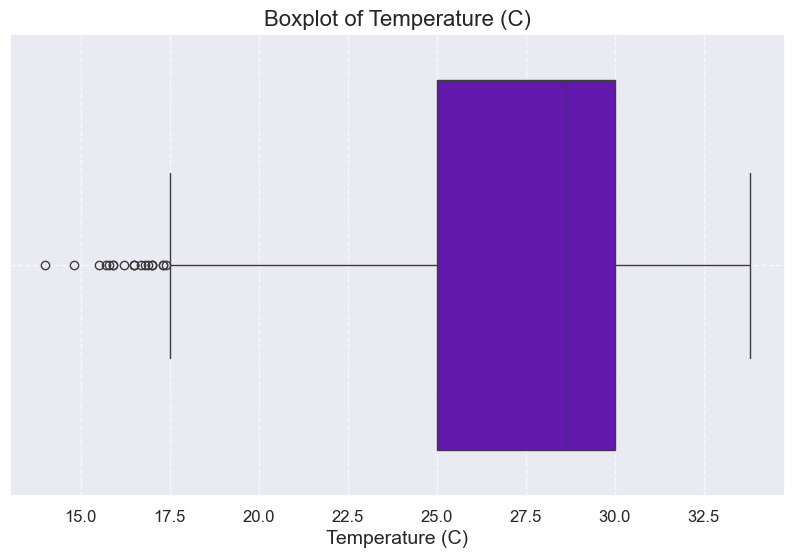

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Temp(C)')
plt.title('Boxplot of Temperature (C)', fontsize=16)
plt.xlabel('Temperature (C)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

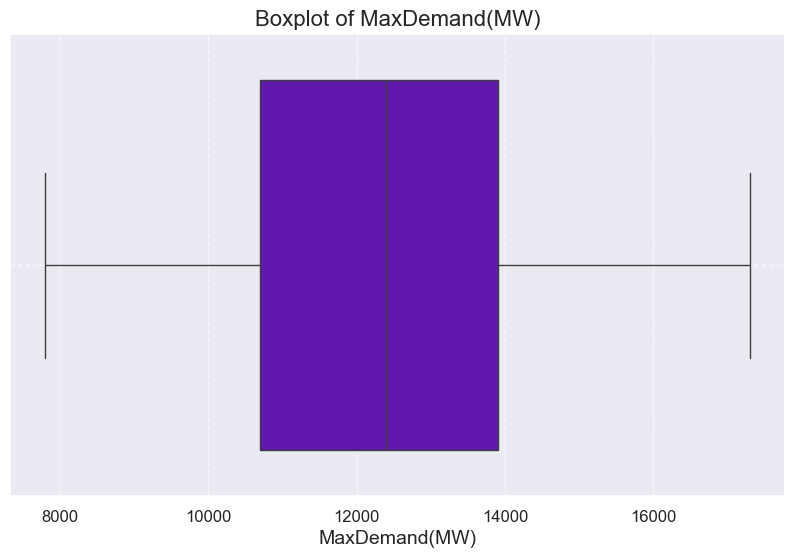

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='MaxDemand(MW)')
plt.title('Boxplot of MaxDemand(MW)', fontsize=16)
plt.xlabel('MaxDemand(MW)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

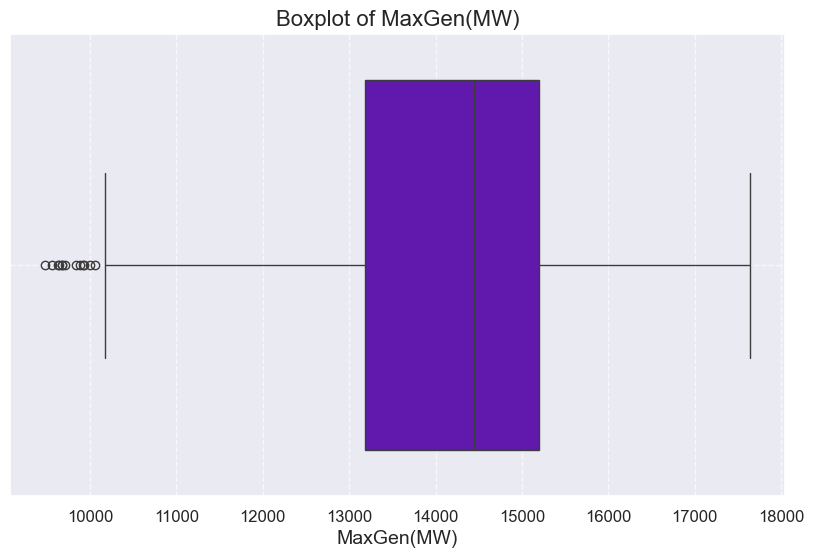

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='MaxGen(MW)')
plt.title('Boxplot of MaxGen(MW)', fontsize=16)
plt.xlabel('MaxGen(MW)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

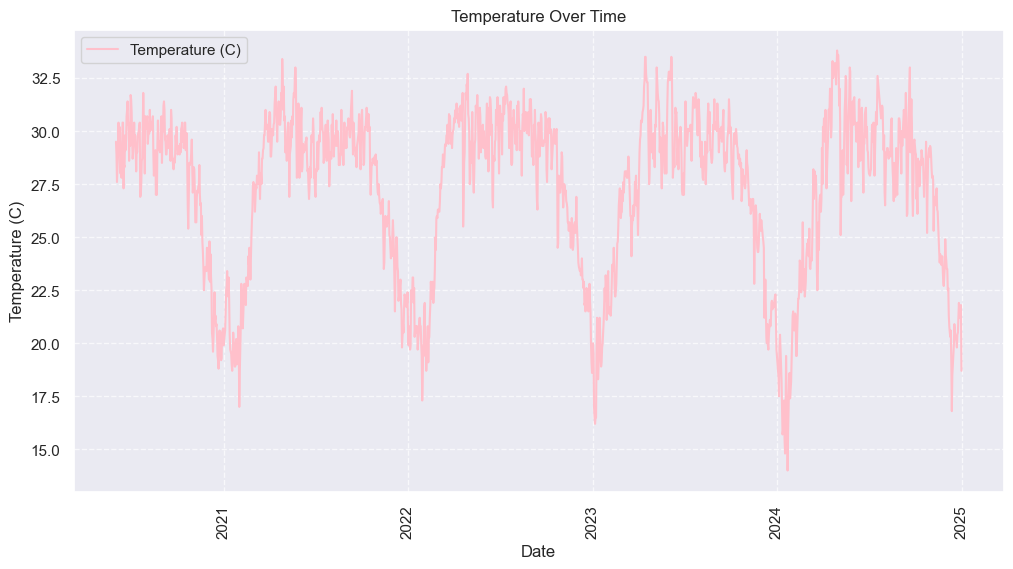

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Temp(C)'], color='pink', label='Temperature (C)')
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

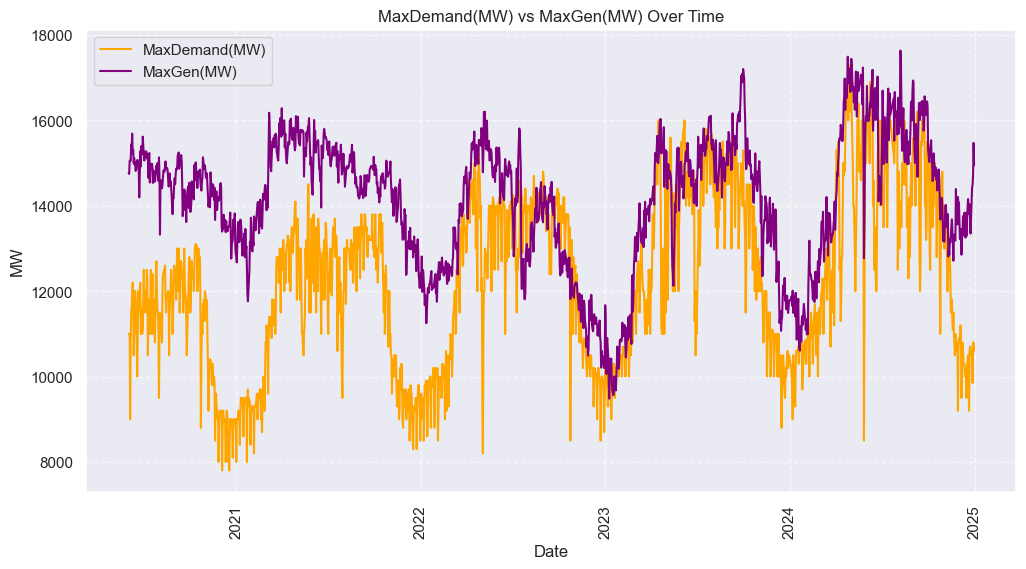

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['MaxDemand(MW)'], color='orange', label='MaxDemand(MW)')
plt.plot(df['Date'], df['MaxGen(MW)'], color='purple', label='MaxGen(MW)')
plt.title('MaxDemand(MW) vs MaxGen(MW) Over Time')
plt.xlabel('Date')
plt.ylabel('MW')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

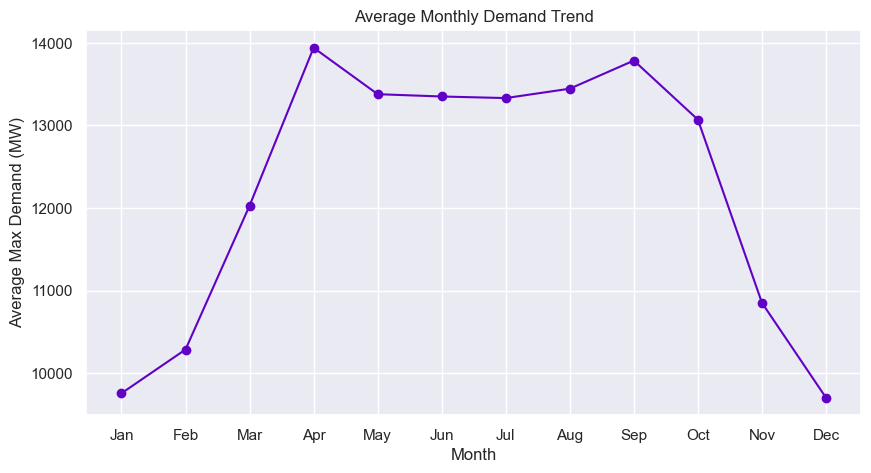

In [26]:
monthly_avg = df.groupby("Month")["MaxDemand(MW)"].mean()
plt.figure(figsize=(10,5))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', linestyle='-')
plt.xlabel("Month")
plt.ylabel("Average Max Demand (MW)")
plt.title("Average Monthly Demand Trend")
plt.xticks(ticks=np.arange(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

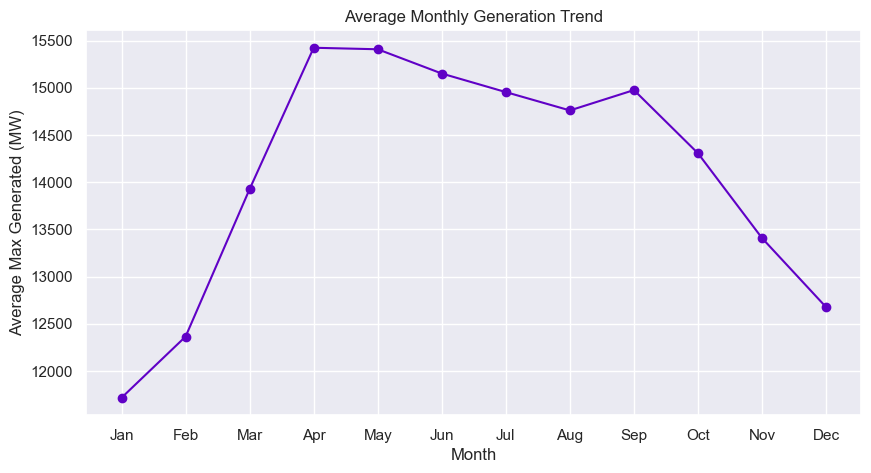

In [27]:
monthly_avg = df.groupby("Month")["MaxGen(MW)"].mean()
plt.figure(figsize=(10,5))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', linestyle='-')
plt.xlabel("Month")
plt.ylabel("Average Max Generated (MW)")
plt.title("Average Monthly Generation Trend")
plt.xticks(ticks=np.arange(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

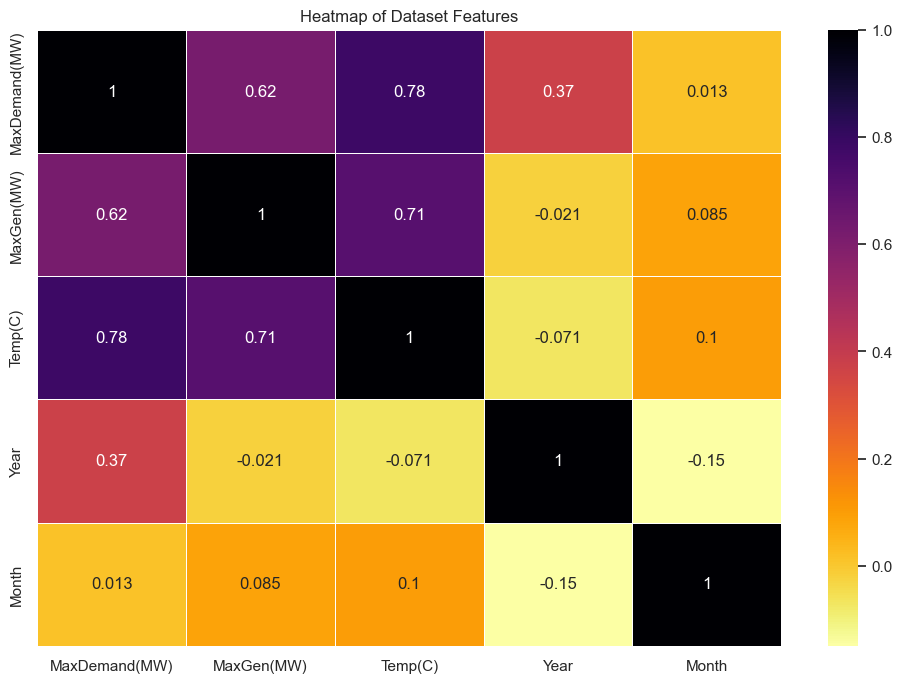

In [29]:
# Generate a heatmap for the dataset

plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=[np.number]) # Exclude non-numeric columns

sns.heatmap(numeric_df.corr(), annot=True, cmap='inferno_r', linewidths=0.5)
plt.title('Heatmap of Dataset Features')
plt.show()